In [1]:
#importing all the libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing and reaading the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
#the first five values in the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#number of rows and columns
dataset.shape

(25, 2)

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


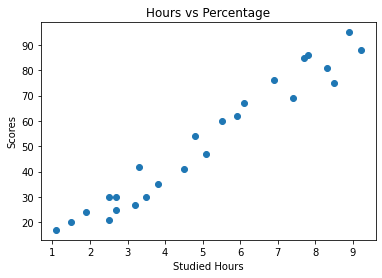

In [6]:
#Hours Vs Percentage of Scores
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

In [7]:
#training and splitting
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
line = regressor.coef_*X+regressor.intercept_

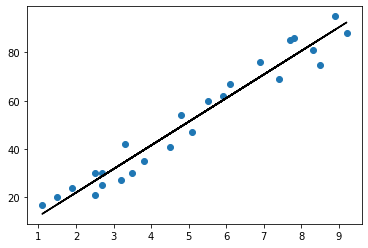

In [24]:
plt.scatter(X, y)
plt.plot(X, line,color = 'black');
plt.show()

In [12]:
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


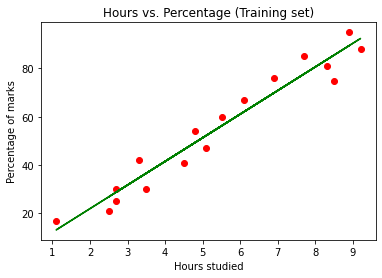

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

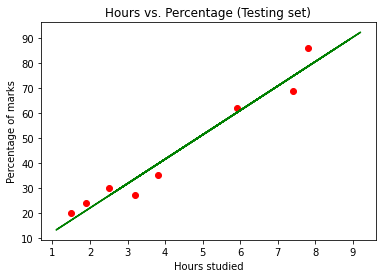

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Hours vs. Percentage (Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()


In [16]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If a student is studying for 9.25 hours/day, the score is {}.".format(pred))

If a student is studying for 9.25 hours/day, the score is [92.91505723].


In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [19]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257
